<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/curiosities/hill_climb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from random import randint, random
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# **Data ficticia**
---

In [2]:
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=1234)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3350, 20) (1650, 20) (3350,) (1650,)


**hill climb**
---

In [5]:
def modify_predictions(current, n_changes = 1):
  updated = current.copy()
  for i in range(n_changes):
    j = randint(0, len(updated)-1)
    updated[j] = 1 - updated[j]
  return updated

In [6]:
def hill_climb(X_test, y_test, max_iterations):
  scores = list()
  # Random predictions
  solutions = [randint(0, 1) for _ in range(X_test.shape[0])]
  # Initial Evaluation
  score = accuracy_score(y_test, solutions)
  scores.append(score)

  for i in range(max_iterations):
    scores.append(score)
    # Stop with the best score
    if score == 1.0:
      break
    # generate new candidate
    candidate = modify_predictions(solutions)
    value = accuracy_score(y_test, candidate)
    if value >= score:
      solutions, score = candidate, value
      #print('>%d, score=%.3f' % (i, score))
  return solutions, scores

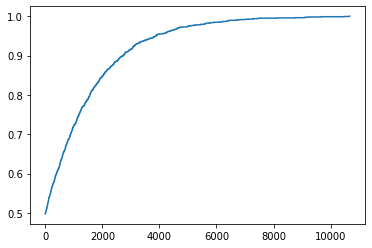

In [7]:
yc, scores = hill_climb(X_test, y_test, 20000)
plt.plot(scores)
plt.show()

- Metrica perfecta, sin tocar el conjunto de entrenamiento.

# **Conjunto de datos de clasificación de diabetes HILL CLimb**

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

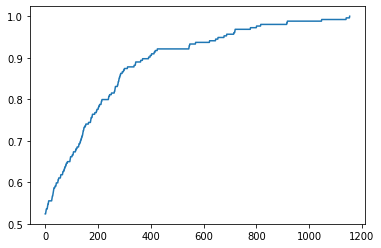

In [9]:
yc, scores = hill_climb(X_test, y_test, 5000)
plt.plot(scores)
plt.show()

# **Conjuntos de datos regresión de viviendas HILL CLimb**

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
data = data.values
X, y = data[:, :-1], data[:, -1]
y = y.reshape((len(y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

- No se estpa entrenando propiamente un algoritmo, no se tienen encuenta buenas practicas.

In [25]:
scaler = MinMaxScaler().fit(y)
y_test = scaler.transform(y_test)

In [27]:
def modify_predictions(current, n_changes = 1):
  updated = current.copy()
  for i in range(n_changes):
    j = randint(0, len(updated)-1)
    updated[j] = random()
  return updated

In [34]:
def hill_climb(X_test, y_test, max_iterations):
  scores = list()
  # Random predictions
  solutions = [randint(0, 1) for _ in range(X_test.shape[0])]
  # Initial Evaluation
  score = mean_absolute_error(y_test, solutions)
  scores.append(score)

  for i in range(max_iterations):
    scores.append(score)
    # Stop with the best error -= low error
    # 1e-7
    if score == 0.0:
      break
    # generate new candidate
    candidate = modify_predictions(solutions)
    value = mean_absolute_error(y_test, candidate)
    if value <= score:
      solutions, score = candidate, value
      #print('>%d, score=%.3f' % (i, score))
  return solutions, scores

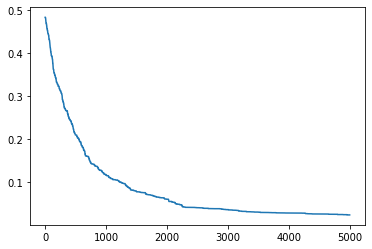

In [35]:
yc, scores = hill_climb(X_test, y_test, 5000)
plt.plot(scores)
plt.show()

más iteraciones en este caso porque es un problema más complejo de optimizar. El método elegido para crear soluciones candidatas también lo hace más lento y menos probable que logremos un error perfecto.

# Referencia
---
https://machinelearningmastery.com/hill-climb-the-test-set-for-machine-learning/